In [ ]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
!unzip -o dataset.zip?dl=0 -d your_destination_directory


Streaming output truncated to the last 5000 lines.
  inflating: your_destination_directory/train/sad/Training_65242339.jpg  
  inflating: your_destination_directory/train/sad/Training_65267116.jpg  
  inflating: your_destination_directory/train/sad/Training_65275626.jpg  
  inflating: your_destination_directory/train/sad/Training_6529266.jpg  
  inflating: your_destination_directory/train/sad/Training_65329617.jpg  
  inflating: your_destination_directory/train/sad/Training_65338712.jpg  
  inflating: your_destination_directory/train/sad/Training_65338797.jpg  
  inflating: your_destination_directory/train/sad/Training_65387162.jpg  
  inflating: your_destination_directory/train/sad/Training_65404494.jpg  
  inflating: your_destination_directory/train/sad/Training_65426218.jpg  
  inflating: your_destination_directory/train/sad/Training_65430136.jpg  
  inflating: your_destination_directory/train/sad/Training_65437377.jpg  
  inflating: your_destination_directory/train/sad/Training_654

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.utils import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy


Flatten layer-Flattens the input. Does not affect the batch size
Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer. Dense layer does the below operation on the input and return the output.

output = activation(dot(input, kernel) + bias)

from tensorflow.keras.utils import img_to_array-Converts a PIL Image instance to a Numpy array

from keras.preprocessing.image import ImageDataGenerator-Generate batches of tensor image data with real-time data augmentation.



MobileNet is a CNN architecture that is much faster as well as a samller modelthat makes use of a new kind of convolution layer know as depthwise separable convolution

In [ ]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


activation function-softmax
optimizer-adam


In [ ]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/your_destination_directory/train", target_size=(224,224), batch_size=32,)


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/your_destination_directory/test",target_size=(224,224), batch_size=32,)

Found 7178 images belonging to 7 classes.


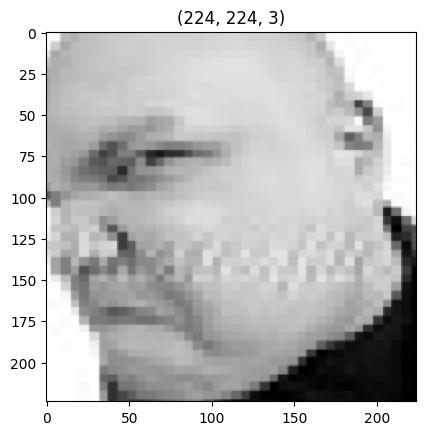

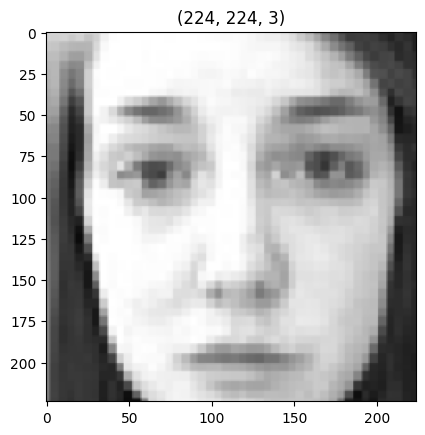

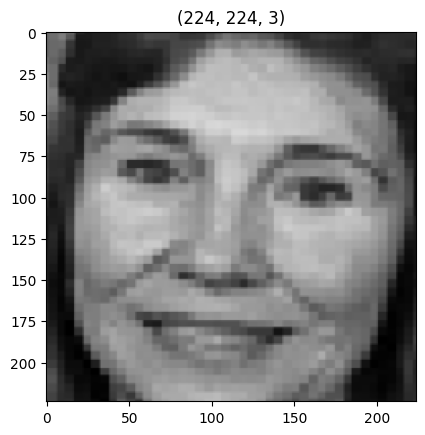

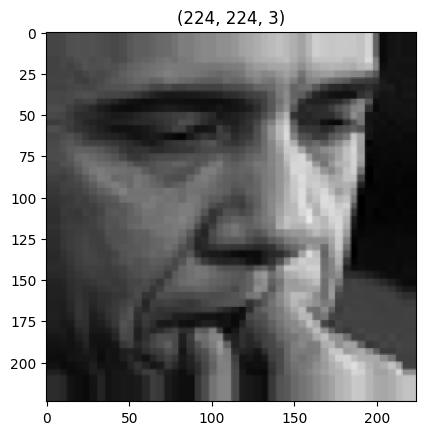

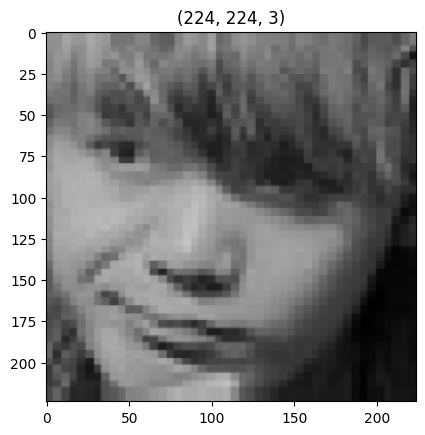

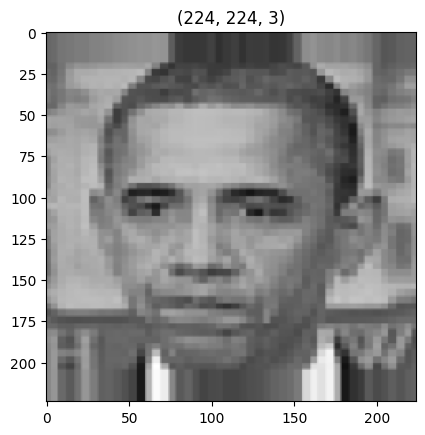

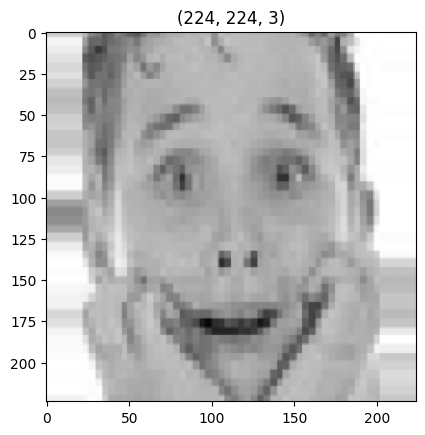

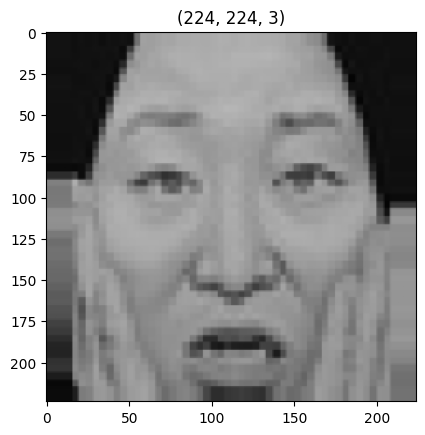

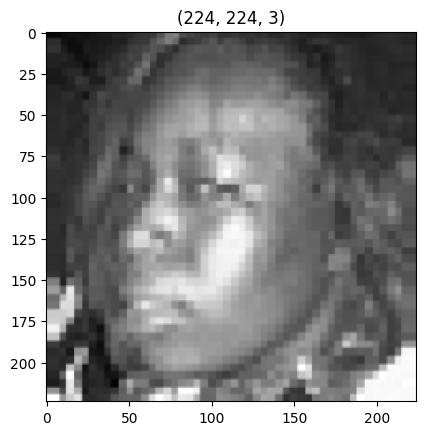

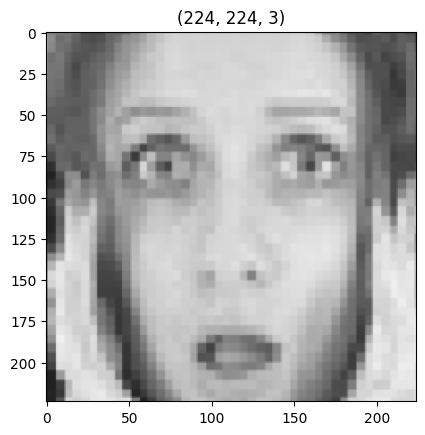

In [ ]:
# to visualize the images in the traing data denerator

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)

In [ ]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]

In [ ]:
hist = model.fit(train_data,steps_per_epoch= 10,epochs= 8,validation_data= val_data,validation_steps= 8, callbacks=[es,mc])

Epoch 1/8
10/10 [==============================] - ETA: 0s - loss: 8.4309 - accuracy: 0.3447
Epoch 1: val_accuracy improved from 0.39453 to 0.42578, saving model to best_model.h5
10/10 [==============================] - 36s 4s/step - loss: 8.4309 - accuracy: 0.3447 - val_loss: 7.1299 - val_accuracy: 0.4258
Epoch 2/8


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - ETA: 0s - loss: 7.2198 - accuracy: 0.3906
Epoch 2: val_accuracy did not improve from 0.42578
10/10 [==============================] - 26s 3s/step - loss: 7.2198 - accuracy: 0.3906 - val_loss: 5.7665 - val_accuracy: 0.4102
Epoch 3/8
10/10 [==============================] - ETA: 0s - loss: 5.1998 - accuracy: 0.4281
Epoch 3: val_accuracy improved from 0.42578 to 0.46094, saving model to best_model.h5
10/10 [==============================] - 27s 3s/step - loss: 5.1998 - accuracy: 0.4281 - val_loss: 5.3092 - val_accuracy: 0.4609
Epoch 4/8
10/10 [==============================] - ETA: 0s - loss: 5.8452 - accuracy: 0.4000
Epoch 4: val_accuracy did not improve from 0.46094
10/10 [==============================] - 26s 3s/step - loss: 5.8452 - accuracy: 0.4000 - val_loss: 6.1583 - val_accuracy: 0.3789
Epoch 5/8
10/10 [==============================] - ETA: 0s - loss: 5.7705 - accuracy: 0.4000
Epoch 5: val_accuracy did not improve from 0.46094
10/10 [=====

# New Section

In [ ]:
# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

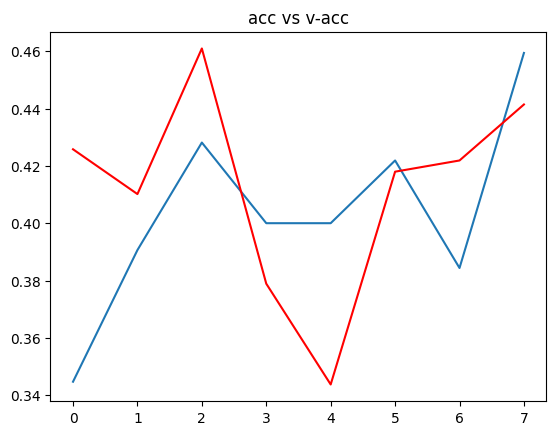

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()


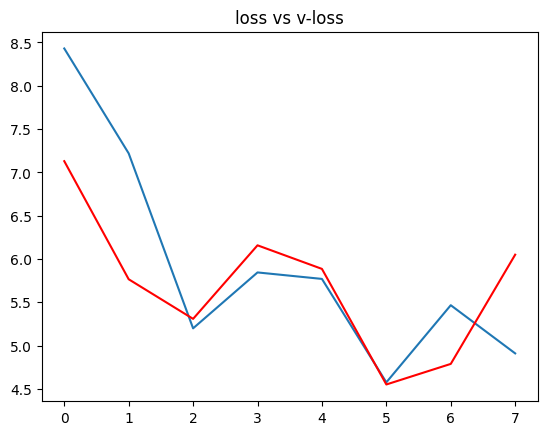

In [ ]:

plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 2s 2s/step
 the image is of angry


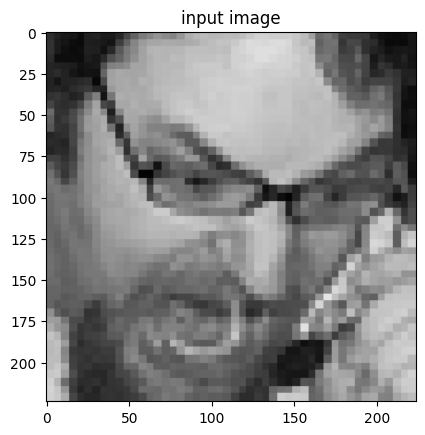

In [ ]:
# path for the image to see if it predics correct class

path = "/content/your_destination_directory/test/angry/PrivateTest_10131363.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=29fddba49a90b5aeff7dddb141176a3723e541584b1652cf3d891b01e0bf2034
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random

In [ ]:
path = "/content/your_destination_directory/test/angry/PrivateTest_10131363.jpg"
img_l = load_img(path, target_size=(224,224) )
i = img_to_array(img_l)/255

input_arr = np.array([i])
input_arr.shape


(1, 224, 224, 3)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 52ms/step


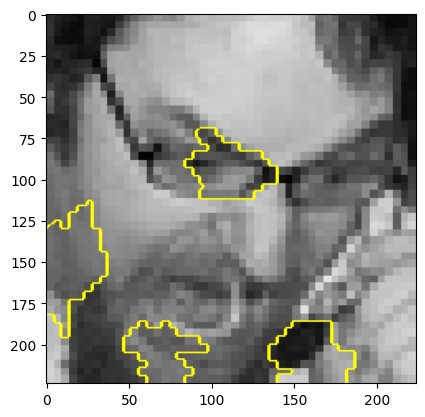

In [ ]:
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(input_arr[0], model.predict,num_samples=100)
plt.imshow(input_arr[0])
image, mask = explanation.get_image_and_mask(
         model.predict(
              input_arr[0].reshape((1,224,224,3))
         ).argmax(axis=1)[0],
         positive_only=True,
         hide_rest=False)
plt.imshow(mark_boundaries(image, mask))

